In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten,Dense,Embedding,GlobalAveragePooling1D

In [3]:
max_words=1000
max_len=200

In [4]:
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=max_words)

In [6]:
X_train=pad_sequences(X_train,maxlen=max_len)
X_test=pad_sequences(X_test,maxlen=max_len)

In [10]:
model=Sequential([
    Embedding(input_dim=max_words,output_dim=128,input_length=max_len),
    GlobalAveragePooling1D(),
    Dense(64,activation='relu'),
    Dense(1,activation='softmax')
])

In [23]:
 model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [24]:
history =model.fit(X_train,y_train,epochs=5,batch_size=512,validation_split=0.2)

Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6761 - loss: 0.9340 - val_accuracy: 0.7050 - val_loss: 0.5037
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7953 - loss: 0.4043 - val_accuracy: 0.8272 - val_loss: 0.3884
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8951 - loss: 0.2592 - val_accuracy: 0.8104 - val_loss: 0.4463
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9114 - loss: 0.2145 - val_accuracy: 0.8118 - val_loss: 0.4698
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9340 - loss: 0.1720 - val_accuracy: 0.8270 - val_loss: 0.4298


In [27]:
loss,accuracy=model.evaluate(X_test,y_test)
print("Loss",loss)
print(f"Accuracy: {accuracy*100:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8262 - loss: 0.4391
Loss 0.4315234124660492
Accuracy: 82.7920


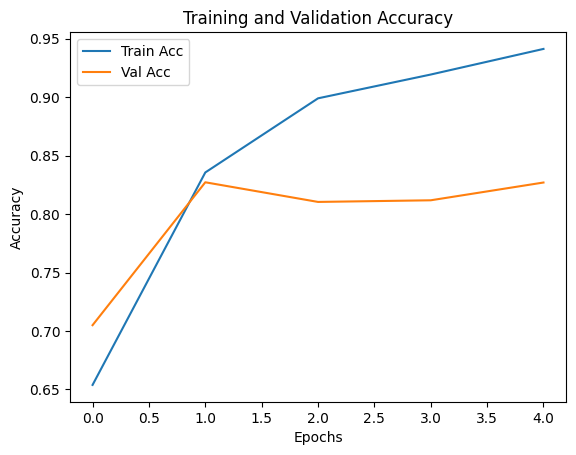

In [26]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()